<a href="https://colab.research.google.com/github/jeniferGoncalvesDaSilvaDev/nba-stats-scraping/blob/main/nba_stats_scraping.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [53]:
import requests as re
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import bernoulli
import seaborn as sb

In [54]:
url = "https://www.nba.com/stats"
site = re.get(url)
print(site)

<Response [200]>


In [55]:
info =BeautifulSoup(site.text,'html.parser')
#print(info.prettify())

In [56]:
jogador = info.find_all(class_="LeaderBoardWithButtons_lbwbCardWrapper__re1TJ")
print(jogador)

[<div class="LeaderBoardWithButtons_lbwbCardWrapper__re1TJ"><div class="LeaderBoardCard_lbcWrapper__e4bCZ LeaderBoardWithButtons_lbwbCardGrid__Iqg6m LeaderBoardCard_leaderBoardCategory__vWRuZ"><h2 class="LeaderBoardCard_lbcTitle___WI9J">Points</h2><hr class="LeaderBoardCard_lbcHr__UDY9r"/><div class="LeaderBoardPlayerCard_lbpc__UG8WY" data-show-padding="true" data-show-team="true"><table class="LeaderBoardPlayerCard_lbpcTable__q3iZD"><tbody><tr class="LeaderBoardPlayerCard_lbpcTableRow___Lod5"><td class="LeaderBoardPlayerCard_lbpcTableCell__SnM1o">1<!-- -->. </td><td><a class="Anchor_anchor__cSc3P LeaderBoardPlayerCard_lbpcTableLink__MDNgL" data-has-children="false" data-has-more="false" data-is-external="false" href="/stats/player/1628369/">Jayson Tatum</a><span class="LeaderBoardPlayerCard_lbpcTeamAbbr__fGlx3">BOS</span></td><td class="LeaderBoardWithButtons_lbwbCardValue__5LctQ"><a class="Anchor_anchor__cSc3P LeaderBoardPlayerCard_lbpcTableLink__MDNgL" data-has-children="false" data

In [57]:
tabela = pd.read_html(str(info))
tabela

<ipython-input-57-5d57e3e21337>:1: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  tabela = pd.read_html(str(info))


[     0                1   2
 0  1.0  Jayson TatumBOS  31
 1  2.0   Luka DoncicDAL  28
 2  3.0  Jaylen BrownBOS  21
 3  4.0  Jrue HolidayBOS  15
 4  4.0  Kyrie IrvingDAL  15,
      0                1   2
 0  1.0   Luka DoncicDAL  12
 1  2.0  Jrue HolidayBOS  11
 2  3.0    Al HorfordBOS   9
 3  4.0  Jaylen BrownBOS   8
 4  4.0  Jayson TatumBOS   8,
      0                1   2
 0  1.0  Jayson TatumBOS  11
 1  2.0  Kyrie IrvingDAL   9
 2  3.0  Jaylen BrownBOS   6
 3  4.0   Luka DoncicDAL   5
 4  5.0  Jrue HolidayBOS   4,
      0                     1  2
 0  1.0    P.J. WashingtonDAL  2
 1  2.0       Jrue HolidayBOS  1
 2  2.0  Derrick Jones Jr.DAL  1
 3  2.0   Dereck Lively IIDAL  1
 4  2.0      Derrick WhiteBOS  1,
      0                 1  2
 0  1.0    Luka DoncicDAL  3
 1  2.0   Jaylen BrownBOS  2
 2  2.0     Al HorfordBOS  2
 3  2.0   Jayson TatumBOS  2
 4  2.0  Derrick WhiteBOS  2,
      0                   1  2
 0  1.0      Luka DoncicDAL  7
 1  2.0  P.J. WashingtonDAL  4
 2  3.0 

In [58]:
pontos= tabela[0]
pontos

,0,1,2
0,1.0,Jayson TatumBOS,31
1,2.0,Luka DoncicDAL,28
2,3.0,Jaylen BrownBOS,21
3,4.0,Jrue HolidayBOS,15
4,4.0,Kyrie IrvingDAL,15


In [59]:
pontos.columns

Index([0, 1, 2], dtype='int64')

In [60]:
nome_jogador = pontos[1]
pontos_jogador=pontos[2]

<Axes: xlabel='2', ylabel='1'>

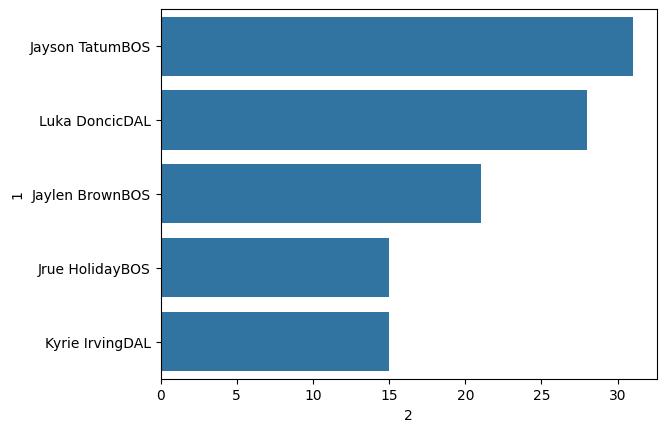

In [61]:
sb.barplot(x=pontos_jogador,y=nome_jogador,data=pontos)

In [ ]:


#probabilidade de Jason Tatum de fazer 31 pontos naquele jogo
n = len(pontos)
p = 1/n
rv=bernoulli(p)
print(rv)
sucesso = rv.pmf(1)
fracasso = rv.pmf(0)
fracasso = round(fracasso,2)
print(sucesso)
print(fracasso)

0.2
0.8


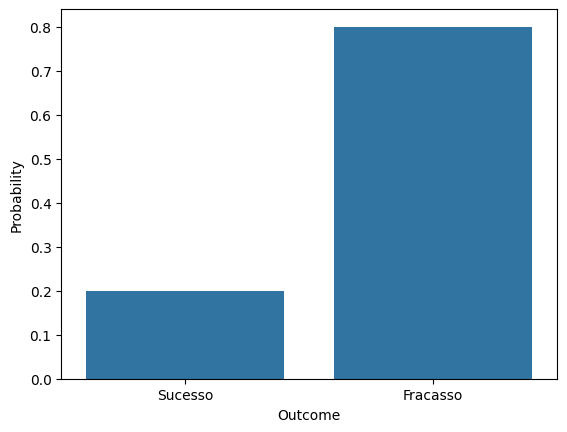

In [ ]:


# Assuming 'sucesso' and 'fracasso' are probabilities
data = {'Outcome': ['Sucesso', 'Fracasso'], 'Probability': [sucesso, fracasso]}
sb.barplot(x='Outcome', y='Probability', data=data)
plt.show()

In [ ]:
tabela= tabela[1]
tabela

,0,1,2
0,1.0,Luka DoncicDAL,12
1,2.0,Jrue HolidayBOS,11
2,3.0,Al HorfordBOS,9
3,4.0,Jaylen BrownBOS,8
4,4.0,Jayson TatumBOS,8
